# Theory Basics: the qubit

This notebook is for beginners! :D Those who are interested in quantum computing but have minimal to no experience. It's <strong>part one</strong> of the Theory Basics series, which is all about the basics of how quantum computing works. Here, I cover <strong>qubits</strong>—the basic unit of information in quantum computing.

#### Prerequisites:
* Familiar with python (e.g. functions, classes, methods, math operations)
* Familiar with jupyter notebooks (know how to run and get around a jupyter notebook)
* Proficient in algebra

If you meet these prereqs, great! :D If not, this notebook may cause confusion or even discourage you from learning more about quantum computing, which is the exact <strong>opposite</strong> of what I intend. I <strong>strongly</strong> encourage you to familiarize yourself with those topics before going on.

Let's dive in!

## Qiskit
To get started, you'll need to [install qiskit](https://qiskit.org/documentation/install.html#install). Qiskit is IBM's open source python library for quantum computing. It has everything you need to make your own algorithms, execute well known algorithms (e.g. QAOA, VQE), and simulated or <strong>real</strong> quantum computers. There are other open source quantum computing libraries out there, but I'll use qiskit for now. I won't cover the details of qiskit, so if you want to learn more, <strong>definitely</strong> go through their "getting started" [tutorials](https://github.com/Qiskit/qiskit-iqx-tutorials/blob/master/qiskit/1_start_here.ipynb).

## Note
I'm going to introduce A LOT of new terms and ideas quickly so we can immediately begin using qiskit. Then, I'll back off and spend more time on core concepts.

In [1]:
# This may take a few seconds
import numpy as np
import pandas as pd
from qiskit import *  # this imports all of qiskit's sublibraries
import matplotlib.pyplot as plt

## The quantum behind quantum computing is the qubit
—plain and simple. Just as normal computers store and manipulate information through [bits](https://en.wikipedia.org/wiki/Bit), quantum computers store and manipulate information through [qubits](https://www.epiqc.cs.uchicago.edu/1qubit). So... what is a qubit? And what rules to they follow?

# The Qubit

The qubit is a quantum bit. (Get it? quantum bit —> qubit? Physics jokes... anyway.) A qubit has two distinct states 0 and 1—much like it's classical companion the bit. However, what distinguishes a qubit from a bit, is (obviously) the <strong>quantum</strong> part! The quantum part of a qubit follows different rules than a bit. The rules are called quantum mechanics, and if you're clever, they <em>can</em> (but not always) lead to <strong>EXPONENTIALLY</strong> faster computation than a computer using bits. Thus, the appeal for making quantum computers.

To work with qubits in qiskit, we start with a <strong>quantum circuit</strong>. You can think of the quantum circuit as the place <strong>where the qubits live</strong> and where you can <strong>manipulate them</strong> (by appling <strong>gates</strong>—more on this later).

In [2]:
# Initialize a quantum circuit
circuit = QuantumCircuit(1,1)  # the argument (1,1) tells qiskit you want 1 qubit and 1 classical bit
circuit.h(0)  # this method applies the Hadamard gate to the 0th qubit
circuit.measure(0,0)  # this method measures the 0th qubit and stores the outcome in the 0th classical bit

# Visualize the constructed circuit
circuit.draw()

You just created a quantum computing code. How cool!! :D

Let's take a moment and discuss what happened. We initialized one qubit and one classical bit by calling ```QuantumCircuit(1,1)```. That's the "q_0:" and "c_0:" part of the drawing above. In qiskit, all qubits are initialized to 0 represented by the "|0>" part of the drawing. Why the need for a classical bit you ask? When the qubit is measured, the result needs to be stored somewhere. The classical bit is where the measurement result is stored. In some experiments you may not need a classical bit to companion every qubit because you don't intent of measure every qubit. (Sometimes, the qubits and they're bit companions are referred to as quantum and classical registers.) Next, we manipulated the qubit with a [Hadamard gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Hadamard_(H)_gate)—the box with the "H" in it. Last of all, we have to measure the qubit! Measurement is represented in qiskit by an "M" in a box with double lines going down to the qubit's companion bit.

Let's run the circuit on a simulated quantum computer to see what happens!

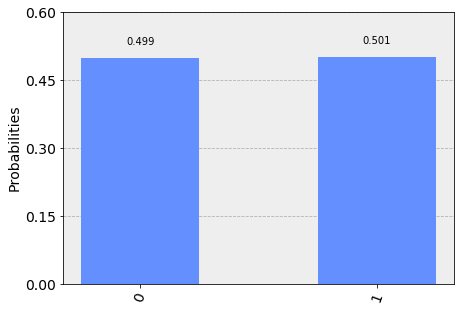

In [3]:
# Initialize a simulated quantum computer
backend = BasicAer.get_backend('qasm_simulator')
# Execute quantum circuit with chosen quantum computer "backend" and number of repetitions "shots"
result = execute(circuit, backend, shots=10000).result()
# Extract classical bit result
counts = result.get_counts(circuit)

# Show results in histogram
visualization.plot_histogram(counts)

The above histogram shows the qubit probability (1 meaning 100%) on the vertical axis with the state label (0 and 1) on the horizontal axis.

Knowing the qubit started in the 0 state, can you tell what the Hadamard gate does?

Based on this result we see it seems to randomly assigns the incoming 0 state to 0 ~50% of the time and 1 the other ~50%. To be sure that's what it does, let's investigate further. What if we input a 1 to the Hadamard gate? To change the 0 state to a 1 state, we use the X or NOT gate. It "nots" input; since there is only the options of 0 and 1, not-0 is 1 and not-1 is 0. To put a 1 in the Hadamard gate, we'll first us the X gate then the Hadamard like so...

In [4]:
# Initialize a quantum circuit
circuit = QuantumCircuit(1,1)  # the argument (1,1) tells qiskit you want 1 qubit and 1 classical bit
circuit.x(0)  # this method applies the X or NOT gate to the 0th qubit
circuit.h(0)  # this method applies the Hadamard gate to the 0th qubit
circuit.measure(0,0)  # this method measures the 0th qubit and stores the outcome in the 0th classical bit

# Visualize the constructed circuit
circuit.draw()

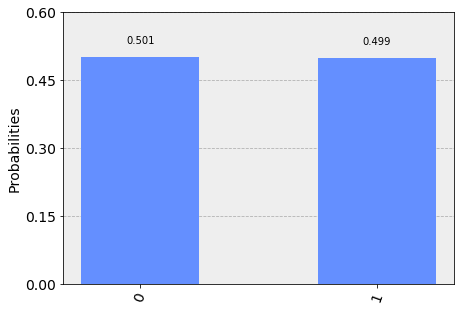

In [5]:
# Execute quantum circuit with chosen quantum computer "backend" and number of repetitions "shots"
result = execute(circuit, backend, shots=10000).result()
# Extract classical bit result
counts = result.get_counts(circuit)

# Show results in histogram
visualization.plot_histogram(counts)

The Hadamard gate takes in 1 and seems to align it randomly to 0 and 1 with even probability—just like what it does to 0!


What if we add a second Hadamard gate? If our guess about what a Hadamard gate does is right, then an incoming 0 state would be randomly assigned to 0 or 1 by the first Hadamard gate. If a 0 goes into the second Hadamard gate, it will come out 0 or 1. If a 1 goes into the second Hadamard gate, we'll also see a 0 or 1. Ultimately, we'd see the same 50% 0 and 50% 1 at the output again.

In [6]:
# Initialize a quantum circuit
circuit = QuantumCircuit(1,1)  # the argument (1,1) tells qiskit you want 1 qubit and 1 classical bit
circuit.h(0)  # this method applies the Hadamard gate to the 0th qubit
circuit.h(0)  # this method applies the Hadamard gate to the 0th qubit
circuit.measure(0,0)  # this method measures the 0th qubit and stores the outcome in the 0th classical bit

# Visualize the constructed circuit
circuit.draw()

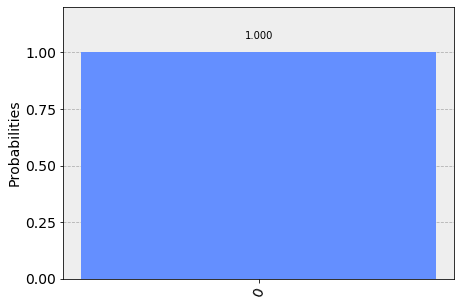

In [7]:
# Execute quantum circuit with chosen quantum computer "backend" and number of repetitions "shots"
result = execute(circuit, backend, shots=10000).result()
# Extract classical bit result
counts = result.get_counts(circuit)

# Show results in histogram
visualization.plot_histogram(counts)

100% 0 is <strong>NOT</strong> what we expected. (Insert your own code to see what happens when a 1 goes through two Hadamard gates.) How is that possible? If a single Hadamard gate randomly assigns the initial 0 state to 0 or 1, did the second Hadamard know which states were coming from the the first gate and purposefully counteracted the first's random assignment? That does not sound very random as we know is the behavior when only one Hadamard gate is being used. This is not explainable with normal logic! (Welcome to quantum weirdness.) 

If SOMEHOW the two Hadamards "know" they're next to each other and somehow align their randomness to cancel out, we should be able to see this if we peak between the two gates. Let's try that next! We'll assign the measurement after the first Hadamard gate to classical bit 0 ("c_0") and the second measurement to classical bit 1 ("c_1").

In [8]:
# Initialize a quantum circuit
circuit = QuantumCircuit(1,2)  # the argument (1,1) tells qiskit you want 1 qubit and 1 classical bit
circuit.h(0)  # this method applies the Hadamard gate to the 0th qubit
circuit.measure(0,0)  # this method measures the 0th qubit and stores the outcome in the 0th classical bit
circuit.h(0)  # this method applies the Hadamard gate to the 0th qubit
circuit.measure(0,1)  # this method measures the 0th qubit and stores the outcome in the 0th classical bit

# Visualize the constructed circuit
circuit.draw()

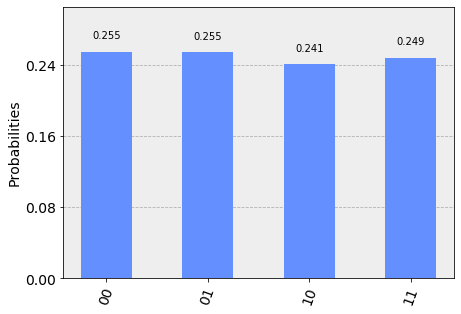

In [9]:
# Execute quantum circuit with chosen quantum computer "backend" and number of repetitions "shots"
result = execute(circuit, backend, shots=10000).result()
# Extract classical bit result
counts = result.get_counts(circuit)

# Show results in histogram
visualization.plot_histogram(counts)

This is obviously very different from the previous two Hadamard gate circuit, but all we did was "peak" between the gates with a measurement!

When more than one classical bit is used, the two (or more) are put next together like "00" or "11". The 0 or 1 in the far right digit place is classical bit 0 (c_0); the next digit to the left is classical bit 1 (c_1). To find the probability of the 0 in the <strong>first</strong> measurement, we add the probabilities for "00" and "10" because the first digit (on the right) are both 0's. That gives ~50%. To find the probability for 1 in the <strong>first</strong> measurement, we add "01" and "11" to get ~50% again! For the <strong>second</strong> measurement we follow the same procedure: "00" + "01" gives ~50% for 0 and "10" + "11" gives ~50% for 1.

Now that we understand how qiskit gives the results, we see the qubit is 50% 0 and 50% 1 after the first Hadamard and 50% 0 and 50% 1 after the second Hadamard! Just how our logical intuition told us the behavior SHOULD have been.